In [ ]:
from IPython.display import display, Image, Audio
import cv2  # We're using OpenCV to read video
import base64
import time
import openai
import os
import requests

In [ ]:
pip install --upgrade openai


In [ ]:
video = cv2.VideoCapture("/messi_data.mp4")

base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()
print(len(base64Frames), "frames read.")

830 frames read.


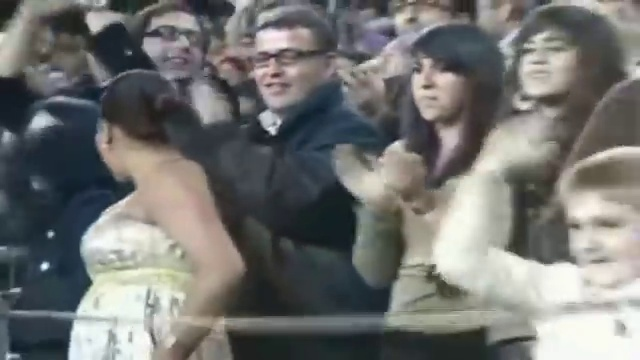

In [ ]:
display_handle = display(None, display_id=True)
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.025)

In [ ]:
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "These are frames of a video. Create a short voiceover script in the style of a super excited indian sports narrator who is narrating his favorite match. He is a big fan of Messi, the player who scores in this clip. Use caps and exclamation marks where needed to communicate excitement. Only include the narration, your output must be in english. When the ball goes into the net, you must scream GOL either once or multiple times.",
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0::10]),
        ],
    },
]
params = {
    "model": "gpt-4-vision-preview",
    "messages": PROMPT_MESSAGES,
    "api_key": "sk-xm++++++++++++++++++++++++++++++++++",  #your api key of openai
    "headers": {"Openai-Version": "2020-11-07"},
    "max_tokens": 500,
}

# result = openai.ChatCompletion.create(**params)
# print(result.choices[0].message.content)


In [ ]:
pip show openai

Name: openai
Version: 1.1.1
Summary: Client library for the openai API
Home-page: 
Author: 
Author-email: OpenAI <support@openai.com>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: anyio, distro, httpx, pydantic, tqdm, typing-extensions
Required-by: llmx


In [ ]:
import openai
result = openai.ChatCompletion.create(**params)

# error getting in this one if someoe solve this give pull request in my github for

In [ ]:
response = requests.post(
    "https://api.openai.com/v1/audio/speech",
    headers={
        "Authorization": f"Bearer YOUR KEY",
    },
    json={
        "model": "tts-1",
        "input": result.choices[0].message.content,
        "voice": "fable",
    },
)

audio = b""
for chunk in response.iter_content(chunk_size=1024 * 1024):
    audio += chunk
Audio(audio)

In [ ]:
# ... your existing code ...

# Now, write the `audio` bytes to an MP3 file
with open('output.mp3', 'wb') as file:
    file.write(audio)

print("The MP3 file has been saved locally as 'output.mp3'.")